In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 18})

import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels as sm
                      
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('sales2.csv',index_col=0, sep='\t')
df=df.astype('float32')
df

,Месяц,Год,Трафик,ЕАПТЕКА,Аир корневища 75г,Алтей корни 75г,Багульник болотный побеги 50г,Береза почки 50г,Бессмертник песчаный цветки 30г,Боярышник плоды 75г,...,"Фп Шалфей листья 20х1,5г","Фп Шиповник плоды 20х2,0г",Чабрец трава 50г,Чага (березовый гриб) 50г,Череда трава 50г,Чистотел трава 50г,Шалфей листья 50г,Шиповник плоды низковитаминные 50г,Эвкалипт прутовидный листья 75г,Эрва шерстистая трава 30г
Январь 2018,1.0,2018.0,22758.0,10648.0,45.0,13.0,17.0,62.0,88.0,67.0,...,49.0,107.0,55.0,633.0,133.0,106.0,228.0,0.0,80.0,52.0
Февраль 2018,2.0,2018.0,24773.0,10725.0,65.0,19.0,26.0,104.0,128.0,107.0,...,70.0,146.0,68.0,538.0,141.0,96.0,219.0,0.0,79.0,66.0
Март 2018,3.0,2018.0,24530.0,11437.0,51.0,23.0,34.0,99.0,122.0,76.0,...,107.0,154.0,44.0,512.0,130.0,111.0,190.0,0.0,80.0,59.0
Апрель 2018,4.0,2018.0,21733.0,10358.0,32.0,19.0,22.0,68.0,74.0,76.0,...,69.0,101.0,42.0,515.0,104.0,102.0,160.0,0.0,53.0,48.0
Май 2018,5.0,2018.0,21862.0,9535.0,37.0,17.0,18.0,53.0,68.0,48.0,...,61.0,75.0,38.0,1390.0,110.0,88.0,144.0,0.0,55.0,54.0
Июнь 2018,6.0,2018.0,21905.0,7551.0,24.0,12.0,9.0,43.0,48.0,60.0,...,49.0,75.0,24.0,796.0,65.0,35.0,133.0,5.0,41.0,28.0
Июль 2018,7.0,2018.0,21401.0,7613.0,59.0,22.0,12.0,49.0,38.0,30.0,...,33.0,62.0,32.0,1031.0,130.0,51.0,119.0,15.0,50.0,64.0
Август 2018,8.0,2018.0,22568.0,9043.0,28.0,28.0,14.0,82.0,56.0,46.0,...,49.0,72.0,44.0,1713.0,98.0,44.0,103.0,31.0,52.0,34.0
Сентябрь 2018,9.0,2018.0,32873.0,9519.0,33.0,11.0,15.0,44.0,83.0,77.0,...,89.0,101.0,34.0,1327.0,136.0,44.0,131.0,30.0,55.0,37.0
Октябрь 2018,10.0,2018.0,55507.0,10881.0,38.0,22.0,12.0,68.0,72.0,71.0,...,89.0,122.0,78.0,627.0,136.0,58.0,166.0,46.0,100.0,41.0


In [4]:
df.index = ['2018-01-31','2018-02-28','2018-03-31','2018-04-30','2018-05-31','2018-06-30','2018-07-31','2018-08-31',
              '2018-09-30','2018-10-31','2018-11-30','2018-12-31','2019-01-31','2019-02-28','2019-03-31','2019-04-30',
               '2019-05-31','2019-06-30','2019-07-31','2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31']
df.index = pd.to_datetime(df.index)

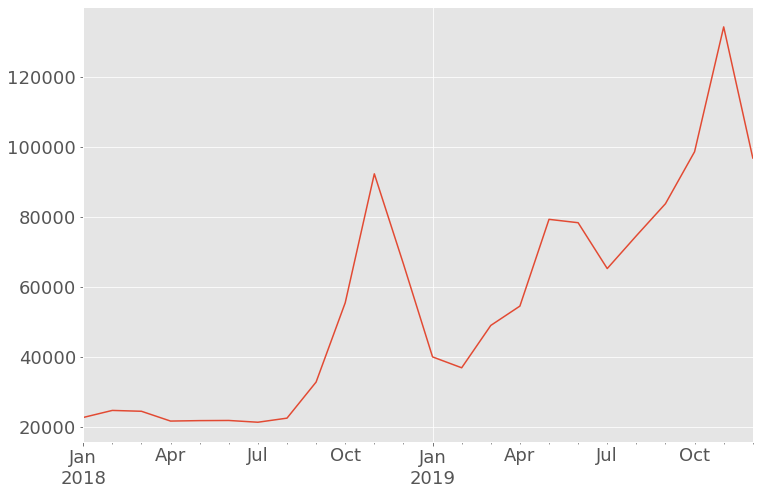

In [5]:
df['Трафик'].plot(figsize=(12,8))

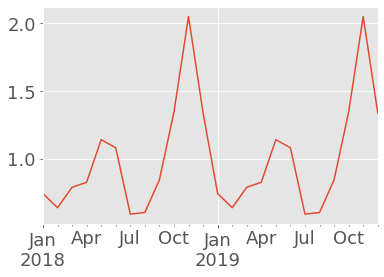

In [6]:
#Seasonal Decompose Plots
a = seasonal_decompose(df["Трафик"], model = "multiplicative")
a.seasonal.plot()

# Sales

In [8]:
sales = pd.DataFrame(df['ЕАПТЕКА'])
sales.rename(columns={"ЕАПТЕКА":"t"}, inplace=True)

In [9]:
train_data = sales.iloc[:-12]
test_data = sales.iloc[12:]

In [10]:
Y = sales['t'].resample('MS').mean()
Y

2018-01-01    10648.0
2018-02-01    10725.0
2018-03-01    11437.0
2018-04-01    10358.0
2018-05-01     9535.0
2018-06-01     7551.0
2018-07-01     7613.0
2018-08-01     9043.0
2018-09-01     9519.0
2018-10-01    10881.0
2018-11-01    10701.0
2018-12-01    11668.0
2019-01-01    10808.0
2019-02-01    10732.0
2019-03-01    10722.0
2019-04-01     9259.0
2019-05-01     6708.0
2019-06-01     6281.0
2019-07-01     6759.0
2019-08-01     6928.0
2019-09-01     8326.0
2019-10-01     9517.0
2019-11-01     9359.0
2019-12-01    10204.0
Freq: MS, Name: t, dtype: float32

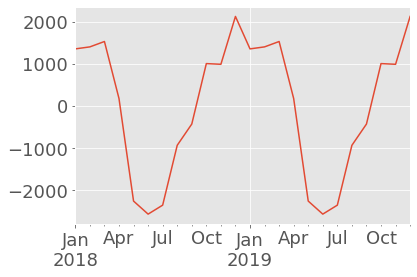

In [14]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(Y, model='additive')  # mult
fig = decomposition.seasonal.plot()
plt.show()

In [15]:
# Just a note for P D Q
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
# P, D, Q
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
#             order, seasonal order
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:488.4454841066881
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:188.65626553986903
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:193.65631871785195
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:199.24604792375743
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:182.74015359700417
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:443.02891534384213
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:166.0693057975207
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:174.81740673608272
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:196.93059630680898
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:164.64268535200264
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:371.4736706766178
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:169.09664338437636
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:167.1835541487792
ARIMA(0, 1, 0)x(0, 1, 1, 12)12

In [ ]:
# (0, 0, 0)x(0, 1, 1, 12  rmse 1407.72
# (0, 0, 0)x(1, 1, 0 12  rmse 1407.72
# (0, 1, 0)x(0, 1, 1, 12  rmse 2451.2
# (0, 1, 0)x(1, 1, 0 12  rmse 2451.2

In [34]:
mod = sm.tsa.statespace.SARIMAX(Y,
                                order=(0,0,0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0           0
sigma2      5.591e+05         -0       -inf      0.000    5.59e+05    5.59e+05


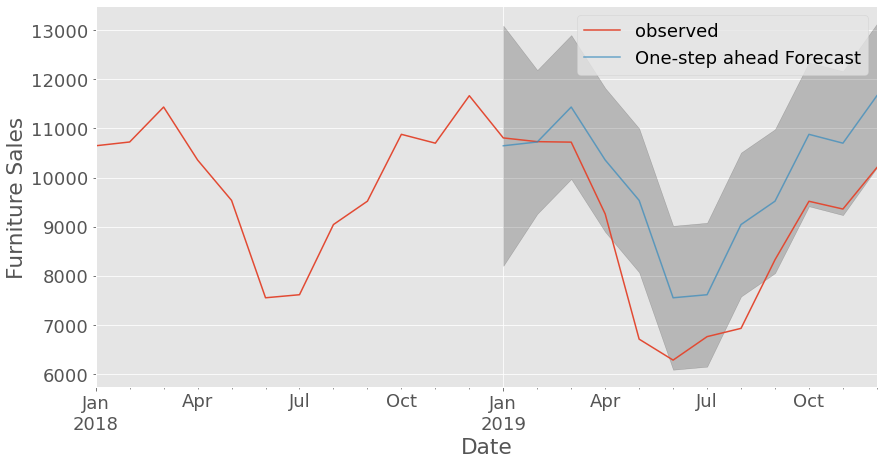

In [35]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = Y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [36]:
y_forecasted = pred.predicted_mean
y_truth = Y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1981670.83


In [37]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1407.72


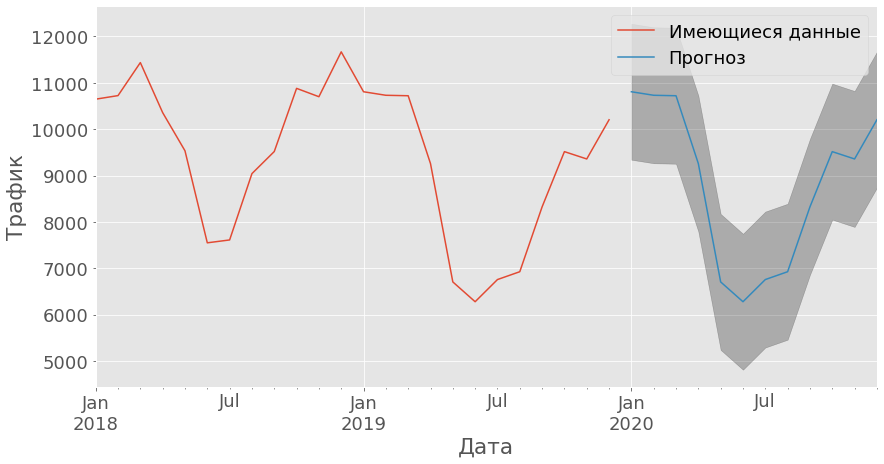

In [38]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = Y.plot(label='Имеющиеся данные', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Прогноз')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)


ax.set_xlabel('Дата')
ax.set_ylabel('Трафик')
# plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

In [42]:
pred_uc.predicted_mean

2020-01-01    10808.0
2020-02-01    10732.0
2020-03-01    10722.0
2020-04-01     9259.0
2020-05-01     6708.0
2020-06-01     6281.0
2020-07-01     6759.0
2020-08-01     6928.0
2020-09-01     8326.0
2020-10-01     9517.0
2020-11-01     9359.0
2020-12-01    10204.0
Freq: MS, dtype: float64

# Traffic

In [43]:
traffic=pd.DataFrame(df['Трафик'])
traffic.rename(columns={"Трафик": "t"}, inplace=True)

train_data = traffic.iloc[:-12]
test_data = traffic.iloc[12:]

In [44]:
y = traffic['t'].resample('MS').mean()
y

2018-01-01     22758.0
2018-02-01     24773.0
2018-03-01     24530.0
2018-04-01     21733.0
2018-05-01     21862.0
2018-06-01     21905.0
2018-07-01     21401.0
2018-08-01     22568.0
2018-09-01     32873.0
2018-10-01     55507.0
2018-11-01     92333.0
2018-12-01     66588.0
2019-01-01     40054.0
2019-02-01     36949.0
2019-03-01     49040.0
2019-04-01     54564.0
2019-05-01     79334.0
2019-06-01     78370.0
2019-07-01     65280.0
2019-08-01     74641.0
2019-09-01     83797.0
2019-10-01     98637.0
2019-11-01    134285.0
2019-12-01     96842.0
Freq: MS, Name: t, dtype: float32

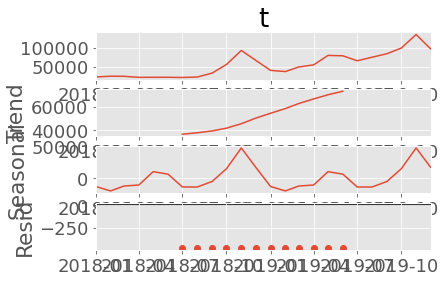

In [45]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [46]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
#             order, seasonal order
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:576.6697660555637
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:259.41815741366565
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:268.53817835983887
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:281.0256822482404
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:261.4104342087255
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:535.3507567998721
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:245.08421125140273
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:239.36262570015032
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:292.6387566548242
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:246.877006485212
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:496.4226556144779
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:221.7339079794887
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:216.89799258930023
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AI

In [ ]:
# traffic
# order=(0,1,0),#                                 seasonal_order=(0, 1, 1, 12),


In [47]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0,1,0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0           0
sigma2      1.055e+08         -0       -inf      0.000    1.06e+08    1.06e+08


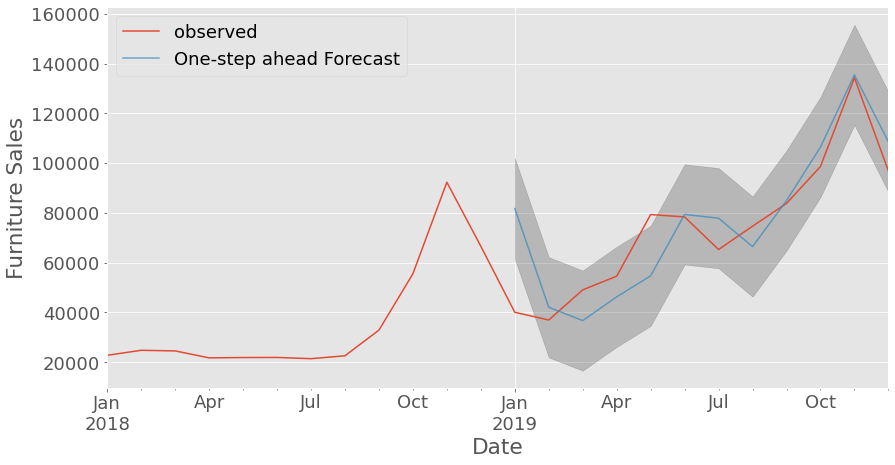

In [48]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [49]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 251750910.0


In [50]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 15866.66


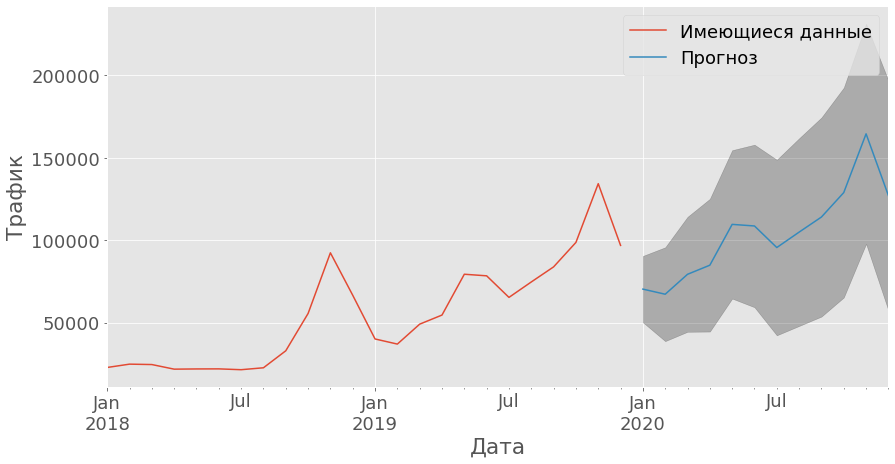

In [51]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Имеющиеся данные', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Прогноз')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

# ax.set_xticks(np.arange(36))
# ax.set_xticklabels(idx)
ax.set_xlabel('Дата')
ax.set_ylabel('Трафик')
# plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

In [52]:
pred_uc.predicted_mean

2020-01-01     70308.0
2020-02-01     67203.0
2020-03-01     79294.0
2020-04-01     84818.0
2020-05-01    109588.0
2020-06-01    108624.0
2020-07-01     95534.0
2020-08-01    104895.0
2020-09-01    114051.0
2020-10-01    128891.0
2020-11-01    164539.0
2020-12-01    127096.0
Freq: MS, dtype: float64

In [54]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error